In [29]:
# Importing Libraries
# Sequential is a fully connected layer - doesn't skips any layer from input to output
from tensorflow.keras.models import Sequential

# Dense Layers are hidden layers, Dropout - To avoid overfitting, neurons are ignored or dropped at random.
# Activation - Used to introdue non-linearity in the model, Flatten - Converts layer's output to 1D and is compulsory to add before Dense Layer
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# Convulation - Used for adding convulations, MaxPooling - Gets the max value from the array 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np

In [30]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [31]:
# Scaling the pixel values between 0 and 1 by dividing it with the max value which is 255
X = X/255.0

In [69]:
# Creating a sequential model
model = Sequential()

model.add(Conv2D(8, (2, 2), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(1)) #Output layer , Sigmoid activation
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y = np.array(y)

In [70]:
history = model.fit(X, y, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 2s 7ms/step - loss: 0.5322 - accuracy: 0.7594 - val_loss: 0.4075 - val_accuracy: 0.8650
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3608 - accuracy: 0.9459 - val_loss: 0.3165 - val_accuracy: 0.9663
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2960 - accuracy: 0.9700 - val_loss: 0.2677 - val_accuracy: 0.9800
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2537 - accuracy: 0.9778 - val_loss: 0.2330 - val_accuracy: 0.9837
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2180 - accuracy: 0.9809 - val_loss: 0.2015 - val_accuracy: 0.9875
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1942 - accuracy: 0.9816 - val_loss: 0.1787 - val_accuracy: 0.9912
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1688 - accuracy: 0.9866 - val_loss: 0.1625 - val_accuracy: 0.9837
Epoch 

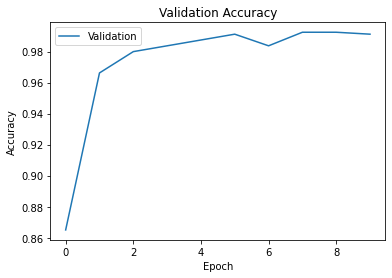

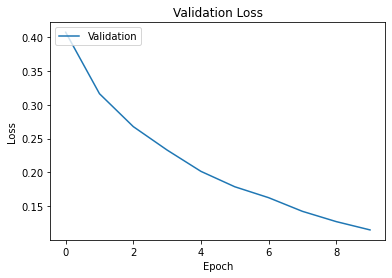

In [72]:
# Used for creating Graph
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [73]:
# Create a pickle of the model using tensorflow
model.save("open-close-eyes")

INFO:tensorflow:Assets written to: open-close-eyes\assets


INFO:tensorflow:Assets written to: open-close-eyes\assets


In [4]:
import cv2
import tensorflow as tf

CATEGORIES = ["Driver is Sleeping","Driver is Awake"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("open-close-eyes")

prediction = model.predict([prepare("hello5.jpeg")]) # choose the pic you want to detect the gender of
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 62ms/step
[[1.]]
Driver is Awake
